##Importing libraries and loading the dataset

In [ ]:
!pip install opendatasets

In [ ]:
#importing necessary libraries

import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aishwaryarauthan
Your Kaggle Key: ··········


100%|██████████| 197M/197M [00:02<00:00, 97.3MB/s]


In [ ]:
# loading all dataframes

aisles = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/aisles.csv')
dept = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/departments.csv')
orders_prior = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv')
orders = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/orders.csv')
prod = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/products.csv')

In [ ]:
orders_prior.shape

(32434489, 4)

Since this dataframe is too huge to work with, we will sample it to a smaller size moving forward.

In [ ]:
orders_prior = orders_prior.sample(frac=0.01, random_state=42)
orders_prior

,order_id,product_id,add_to_cart_order,reordered
29481110,3109255,34099,16,0
2852353,301098,41950,5,0
11194500,1181866,45066,8,0
15909397,1678630,8859,2,1
6101870,644090,24781,2,0
...,...,...,...,...
13579781,1433375,34969,5,1
22168330,2338221,10248,10,0
4041427,426460,27676,7,0
4328233,456879,38028,2,1


In [ ]:
# joining them together on common keys

df1 = pd.merge(prod, aisles, how='inner', on='aisle_id')
df2 = df1.merge(dept, how='inner', on='department_id')
df3 = df2.merge(orders_prior, how='inner', on='product_id')
df4 = df3.merge(orders, how='inner', on='order_id')

#simplifying pnenomics and displaying the dataframe
df = df4.copy()
df.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,prior,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,prior,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,prior,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,prior,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,prior,15,3,16,15.0


##Exploring the dataset

In [ ]:
df.eval_set.unique()

array(['prior'], dtype=object)

In [ ]:
df = df.drop('eval_set', axis=1)

Dropping the eval_set column since it holds no relevance and is merely a label for orders with only one label present.

In [ ]:
df.isna().sum()

product_id                     0
product_name                   0
aisle_id                       0
department_id                  0
aisle                          0
department                     0
order_id                       0
add_to_cart_order              0
reordered                      0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    227065
dtype: int64

Null values are only observed in the 'days_since_prior_order' column. We shall explore this further now.

In [ ]:
df[df.days_since_prior_order.isnull()]

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0.0,50005,1,1,15,NaN
29,40199,Chocolate Chip Cookies,61,19,cookies cakes,snacks,9273,18,0.0,50005,1,1,15,NaN
30,11759,Organic Simply Naked Pita Chips,107,19,chips pretzels,snacks,9273,11,0.0,50005,1,1,15,NaN
31,45051,Pub Mix,107,19,chips pretzels,snacks,9273,7,0.0,50005,1,1,15,NaN
32,10509,Organic Animal Crackers,78,19,crackers,snacks,9273,23,0.0,50005,1,1,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555044,43056,Gourmet Sesame Seed Restaurant Style Hamburger...,43,3,buns rolls,bakery,3777,1,0.0,53572,1,6,17,NaN
3555052,6621,"Melatonin, 1 mg, Liquid",6,2,other,other,397111,1,0.0,8375,1,2,0,NaN
3555056,12412,Organic Coco Whip,6,2,other,other,102924,1,0.0,116014,1,3,17,NaN
3555105,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,411935,1,0.0,61591,1,4,15,NaN


These null values might be suggesting that no prior purchase of the product was made by the customer. We can impute it with an arbitrary float value instead so that it is in line with the datatype of the column and holds value.

In [ ]:
# imputing a value to null values of days_since_prior_order so that those rows can be used for meaningful analysis

df['days_since_prior_order'].fillna(9999.0, inplace=True) # here 9999 is our arbitrary number
df['days_since_prior_order'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3555116 entries, 0 to 3555115
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   aisle                   object 
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               float64
 9   user_id                 int64  
 10  order_number            int64  
 11  order_dow               int64  
 12  order_hour_of_day       int64  
 13  days_since_prior_order  float64
dtypes: float64(2), int64(9), object(3)
memory usage: 406.9+ MB


The data types seem relevant to their respective columns.

In [ ]:
df.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06,3.555116e+06
mean,2.557364e+04,7.120808e+01,9.924759e+00,2.520608e+05,8.349991e+00,5.901172e-01,7.666557e+04,1.722833e+01,2.743091e+00,1.341898e+01,6.490105e+02
std,1.409721e+04,3.820338e+01,6.282166e+00,1.455113e+05,7.137457e+00,4.918119e-01,4.416769e+04,1.758883e+01,2.087616e+00,4.247757e+00,2.442271e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.351700e+04,3.100000e+01,4.000000e+00,1.258590e+05,3.000000e+00,0.000000e+00,3.864200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,2.523000e+04,8.300000e+01,9.000000e+00,2.518140e+05,6.000000e+00,1.000000e+00,7.654700e+04,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,3.793100e+04,1.070000e+02,1.600000e+01,3.783970e+05,1.100000e+01,1.000000e+00,1.145390e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.800000e+01
max,4.968800e+04,1.340000e+02,2.100000e+01,5.039170e+05,1.270000e+02,1.000000e+00,1.534120e+05,9.900000e+01,6.000000e+00,2.300000e+01,9.999000e+03


In [ ]:
df.describe(include='object')

,product_name,aisle,department
count,3555116,3555116,3555116
unique,44073,134,21
top,Banana,fresh fruits,produce
freq,52071,398830,1039669


Having a look at the summary statistics gives us a clearer picture of the dataset to perform further analysis.

In [ ]:
# converting day of the week (dow) of order from numerical to weekday name

# Define a mapping dictionary
dow_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Use the map function to apply the mapping
df['order_dow'] = df['order_dow'].map(dow_mapping)
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0.0,38259,2,Monday,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,1107,6,0.0,38259,2,Monday,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,1107,2,0.0,38259,2,Monday,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,1107,10,0.0,38259,2,Monday,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,1107,9,0.0,38259,2,Monday,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555111,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,272151,1,0.0,127714,1,Friday,10,9999.0
3555112,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,367910,1,1.0,34233,25,Saturday,16,18.0
3555113,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk,399142,1,0.0,28218,46,Wednesday,7,8.0
3555114,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,475530,1,0.0,105151,11,Tuesday,15,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3555116 entries, 0 to 3555115
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   aisle                   object 
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               float64
 9   user_id                 int64  
 10  order_number            int64  
 11  order_dow               object 
 12  order_hour_of_day       int64  
 13  days_since_prior_order  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 406.9+ MB


In [ ]:
df.isna().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

##EDA

Performing various exploratory data analyses to get to know the data better.

In [ ]:
# number of unique products in each aisle

df.groupby('aisle').product_id.nunique()

aisle
air fresheners candles           290
asian foods                      545
baby accessories                  33
baby bath body care              118
baby food formula                663
                                ... 
trash bags liners                102
vitamins supplements             789
water seltzer sparkling water    325
white wines                      121
yogurt                           965
Name: product_id, Length: 134, dtype: int64

In [ ]:
# number of unique products in each departments

df.groupby('department').product_id.nunique()

department
alcohol             875
babies              979
bakery             1401
beverages          3948
breakfast          1029
bulk                 38
canned goods       1886
dairy eggs         3243
deli               1237
dry goods pasta    1685
frozen             3688
household          2686
international       988
meat seafood        821
missing             888
other               453
pantry             4746
personal care      5361
pets                855
produce            1610
snacks             5656
Name: product_id, dtype: int64

In [ ]:
# order id with the biggest order

max_order = df.add_to_cart_order.max()
df[df.add_to_cart_order==max_order].loc[:,['order_id', 'user_id']]

,order_id,user_id
383094,61355,22906


In [ ]:
# top customers based on purchase quantity

top_cust = df.groupby('user_id').order_id.count().reset_index()
top_cust.sort_values('order_id', ascending = False).head(10)

,user_id,order_id
4137,5588,522
3468,4694,509
38370,52008,508
4968,6710,506
107522,145686,490
48611,65897,486
2831,3830,483
42468,57546,479
85921,116255,477
13114,17738,477


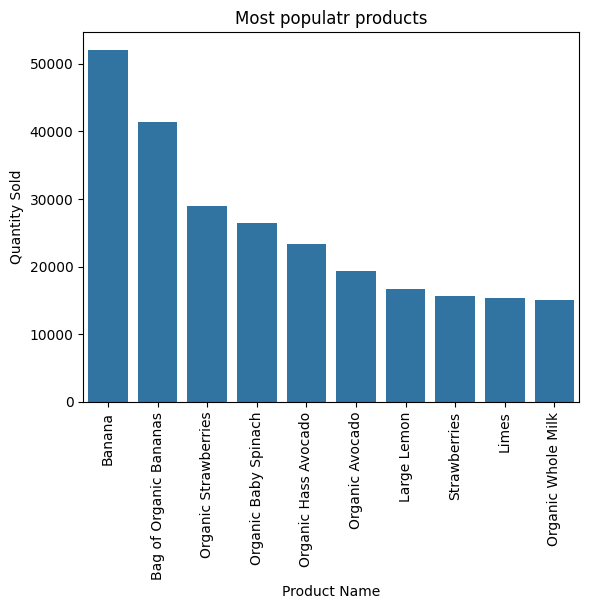

In [ ]:
# most popular products based on purchases

top_prod = df.product_name.value_counts().reset_index()
top_prod = top_prod.sort_values('product_name', ascending = False).head(10)

sns.barplot(data=top_prod, x='index', y='product_name')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Most populatr products')
plt.xticks(rotation=90)
plt.show()

###Further Analysis